<a href="https://colab.research.google.com/github/dvircohen0/Machine-Learning-Algorithms-From-Scratch/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import pandas as pd
from math import sqrt
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn import preprocessing

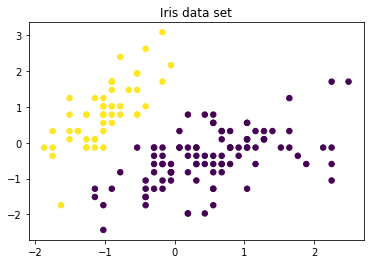

In [175]:
iris = load_iris()
data = preprocessing.scale(iris.data[:,:2])
labels = np.array([1 if x==0 else 0 for x in iris.target])

plt.scatter(data[:,0],data[:,1],c=labels, s=30)
plt.title('Iris data set')           
plt.show()

x_train,x_test,y_train,y_test = train_test_split(data,labels) 

In [222]:
class LogisticRegressuin:
  def __init__(self, lr=0.00001, n_iter = 1000):
    self.lr=lr
    self.n_iter=n_iter
    self.W = None
    self.b = None

  def logit(self,x):
      return 1/(1+np.exp(-x))

  def fit(self, X, y):
    n_samples, n_features = X.shape
    self.W = np.zeros(n_features)
    self.b = 0

    #gradient loop
    for _ in range(self.n_iter):
      y_pred = self.logit(np.dot(X, self.W) + self.b)
      dw = (1/n_samples) * np.dot(X.T, (y_pred-y))
      db = (1/n_samples) * np.sum(y_pred-y)

      self.W -= self.lr * dw
      self.b -= self.lr * db


  def predict(self,X):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    return y_predicted_class


  def score(self,X,y):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    accuracy = np.sum(y==y_predicted_class) / len(y)
    return accuracy


  def percision(self,X,y):
    y_predicted_prob = self.logit(np.dot(X, self.W) + self.b)
    y_predicted_class = [1 if i > 0.5 else 0 for i in y_predicted_prob]
    TP_and_FP = y_predicted_class.count(1)
    TP = np.sum([1 for i in range(len(y)) if y_predicted_class[i]==y[i]==1])
    precision = TP / TP_and_FP
    return precision


In [223]:
LR = LogisticRegressuin(lr=0.0001, n_iter = 10000)
LR.fit(x_train,y_train)

print('accuracy score {:.2%}'.format(LR.score(x_test, y_test)))
print('percision score {:.2%}'.format(LR.percision(x_test, y_test)))  

accuracy score 94.74%
percision score 90.91%


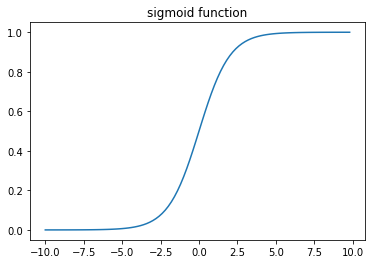

In [203]:
x = np.arange(-10, 10, 0.2)
sig = LR.logit(x)
plt.plot(x,sig)
plt.title("sigmoid function")
plt.show()

In [180]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(x_train,y_train)
clf.score(x_test, y_test)

0.9736842105263158